## Draw the results related to the simulation cases in vector space

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_data_from_files(file_names):
    data = []
    for file_name in file_names:
        try:
            df = pd.read_csv(file_name, header=None) # header=None, otherwise the first row will be treated as header
            data.append(df.values)
            continue
        except:
            print('File {} does not exist or not csv'.format(file_name))

        try:
            data.append(np.load(file_name))
            continue
        except:
            print('File {} does not exist or not npy'.format(file_name))
    return data

In [3]:

def plot_scatter_plots(dataset):
    k = len(dataset)

    fig, axs = plt.subplots(3, k//3, figsize=(3*(k//3), 3*3))
    
    colnames = ['Input','MFCGAN', #'Our Samples', 
                'RoundTrip','MADE','MAF','RealNVP']
    rownames =['A', 'B', 'C']

    for col in range(k//3):
        # Get the corresponding subplot for the current column
        ax = axs[0, col]
        
        # Set the title or text on top of the column
        ax.set_title(colnames[col], fontsize=20)
    
    for row in range(3):
        ax = axs[row, 0]
        ax.set_ylabel(rownames[row], rotation=0, fontsize=20,loc = 'top', labelpad = -15)

    axs = axs.flatten()

    for i in range(k):
        data = dataset[i]
        x_values = data[:, 0]
        y_values = data[:, 1]
        axs[i].scatter(x_values, y_values,s=0.5)
        axs[i].set(aspect='equal')

    plt.tight_layout()
    plt.show()


File results\roundtrip\circle.npy does not exist or not csv
File results\roundtrip\involute.npy does not exist or not csv
File results\roundtrip\torus.npy does not exist or not csv


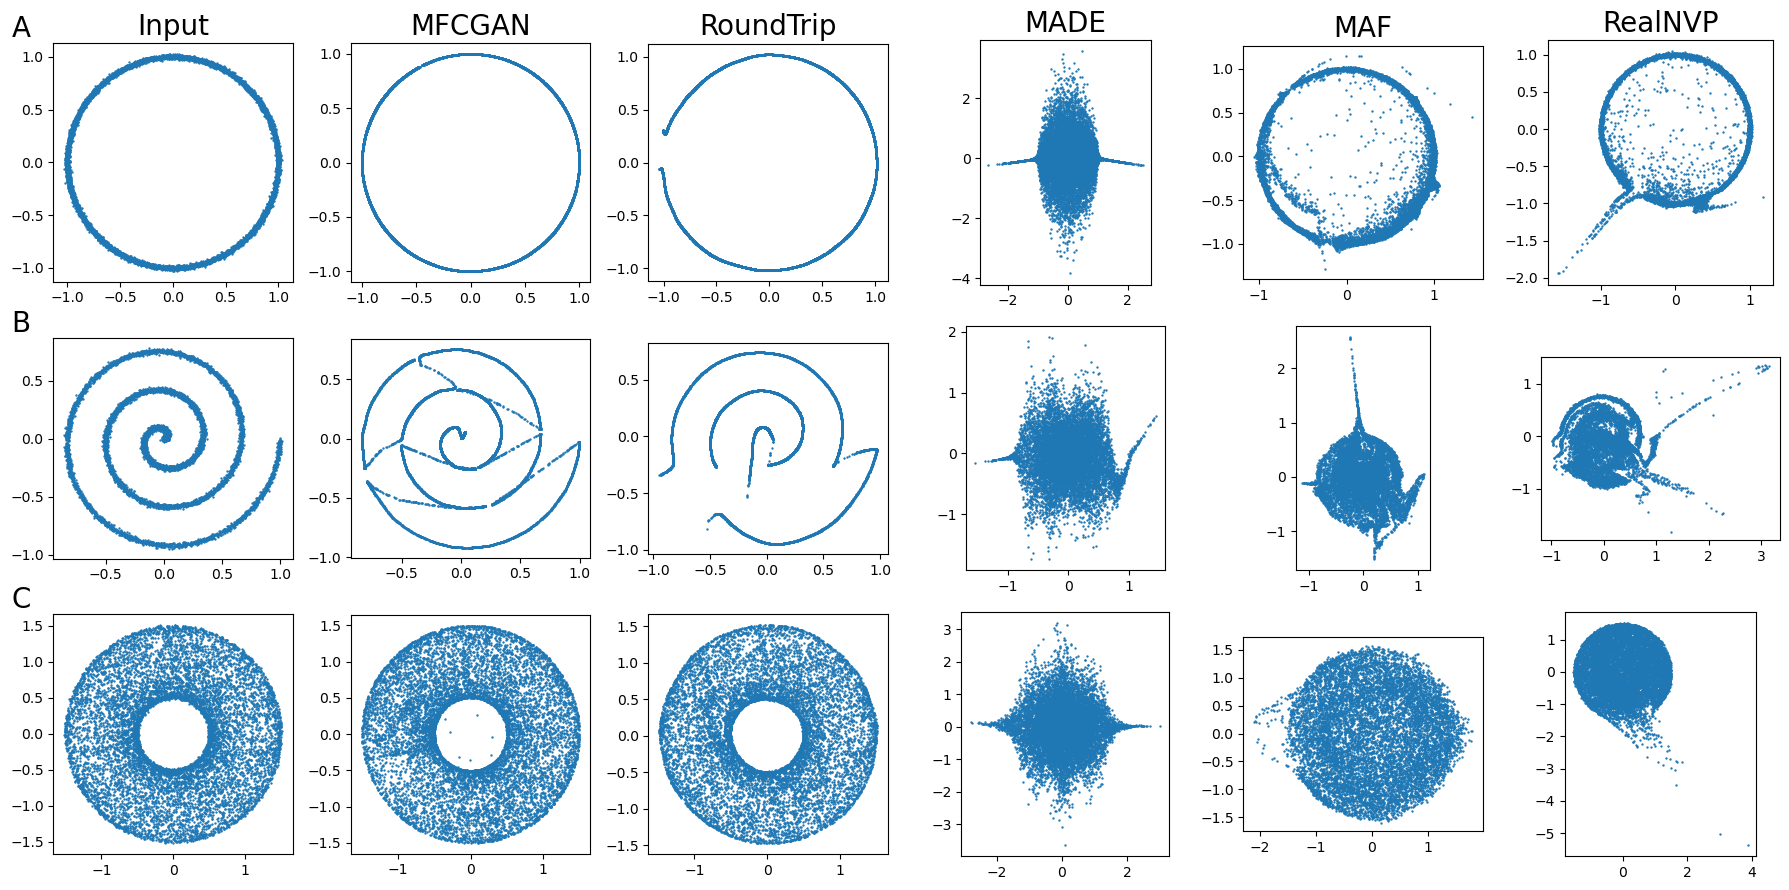

In [4]:
file_names = [
    'datasets\circle\B.csv','results\circle\data_out.csv', #'results\circle\data_noise.csv', 
    'results\\roundtrip\circle.npy', 
    'results\\normalizing_flows\made\CIRCLE_sample.csv', 'results\\normalizing_flows\maf\CIRCLE_sample.csv', 'results\\normalizing_flows\\realnvp\CIRCLE_sample.csv',

    'datasets\involute\B.csv','results\involute\data_out.csv', #'results\involute\data_noise.csv', 
    'results\\roundtrip\involute.npy',
    'results\\normalizing_flows\made\INVOLUTE_sample.csv',  'results\\normalizing_flows\maf\INVOLUTE_sample.csv', 'results\\normalizing_flows\\realnvp\INVOLUTE_sample.csv',

    'datasets\\torus\B.csv','results\\torus\data_out.csv', #'results\\torus\data_noise.csv' , 
    'results\\roundtrip\\torus.npy',
    'results\\normalizing_flows\made\TORUS_sample.csv', 'results\\normalizing_flows\maf\TORUS_sample.csv', 'results\\normalizing_flows\\realnvp\TORUS_sample.csv',]

# Read data from files
data = read_data_from_files(file_names)

# Plot scatter plots
plot_scatter_plots(data)

File results\roundtrip\circle.npy does not exist or not csv


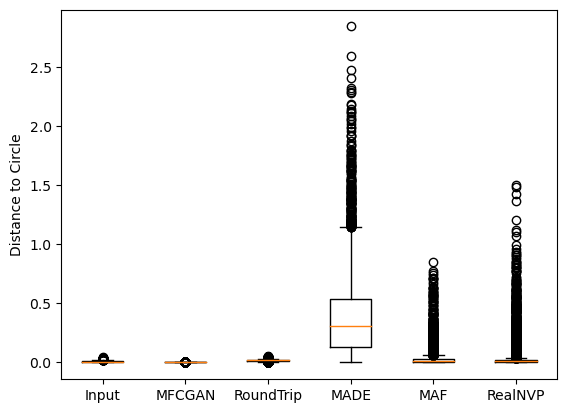

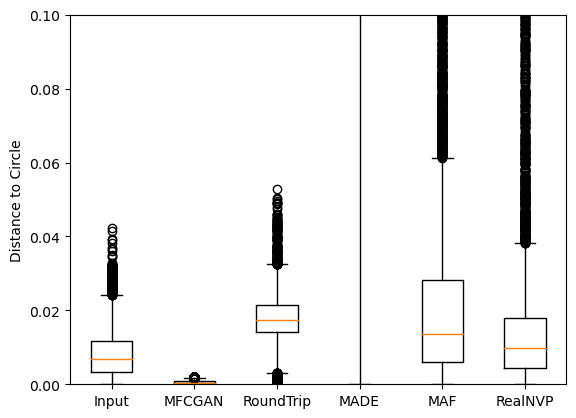

Distance to Circle

                  0             1             2             3             4  \
count  1.000000e+04  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean   8.131692e-03  5.664625e-04      0.017812      0.367412      0.031563   
std    6.144177e-03  4.442083e-04      0.008061      0.301344      0.061160   
min    8.375504e-07  2.129080e-07      0.000001      0.000062      0.000004   
50%    6.844955e-03  4.404158e-04      0.017292      0.307169      0.013507   
75%    1.167518e-02  7.901199e-04      0.021524      0.538383      0.028160   
95%    1.998550e-02  1.604063e-03      0.032225      0.881255      0.130861   
99%    2.643106e-02  1.876568e-03      0.035576      1.383261      0.294882   
max    4.235168e-02  2.080943e-03      0.052743      2.844948      0.852543   

                  5  
count  1.000000e+04  
mean   3.095717e-02  
std    8.910046e-02  
min    8.994067e-07  
50%    9.704864e-03  
75%    1.793796e-02  
95%    1.430666e-01  
99%    4.8010

In [5]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# List of CSV files
files = ['datasets\circle\B.csv','results\circle\data_out.csv', #'results\circle\data_noise.csv', 
         'results\\roundtrip\circle.npy', 
    'results\\normalizing_flows\made\CIRCLE_sample.csv', 'results\\normalizing_flows\maf\CIRCLE_sample.csv', 'results\\normalizing_flows\\realnvp\CIRCLE_sample.csv']
data = read_data_from_files(files)
Dist = []

for df in data:
    distances = np.linalg.norm(df, axis=1) - 1
    distances = np.abs(distances)
    Dist.append(distances)

# Plot boxplots

Dist = np.array(Dist).T

plt.boxplot(Dist,labels=['Input','MFCGAN', #'Our Samples',
                'RoundTrip','MADE','MAF','RealNVP'])
plt.ylabel('Distance to Circle')
plt.show()

plt.boxplot(Dist,labels=['Input','MFCGAN', #'Our Samples',
                'RoundTrip','MADE','MAF','RealNVP'])
plt.ylabel('Distance to Circle')
plt.ylim(0, 0.1)
plt.show()

Dist = pd.DataFrame(Dist)
print('Distance to Circle\n')
print(Dist.describe(percentiles=[0.75,0.95,0.99])) # Mean, std, min, max, quartiles
print('Percentage of points with distance > 0.03\n')
print(Dist.apply(lambda col: (col > 0.03).mean() * 100))


statistics = {
    'Mean': np.mean(Dist, axis=0),
    'SD': np.std(Dist, axis=0),
    'Quantile': np.quantile(Dist, q=0.95, axis=0),
    'Percentage > 0.03': np.mean(Dist > 0.03, axis=0) * 100
}

# Create a new dataframe with the calculated statistics
stats_df = pd.DataFrame(statistics)

# Format the numbers to retain two decimal places or use scientific notation
formatted_stats_df = stats_df.applymap(lambda x: f'{x:.2f}' if x >= 0.01 else f'{x:.2e}')

# Print the formatted statistics dataframe
print(formatted_stats_df)

File results\roundtrip\involute.npy does not exist or not csv


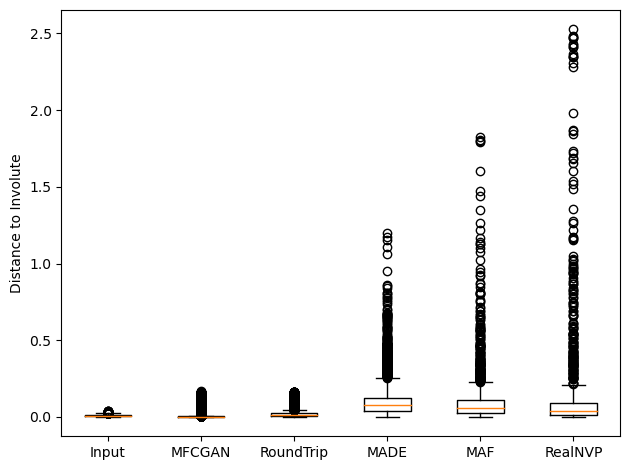

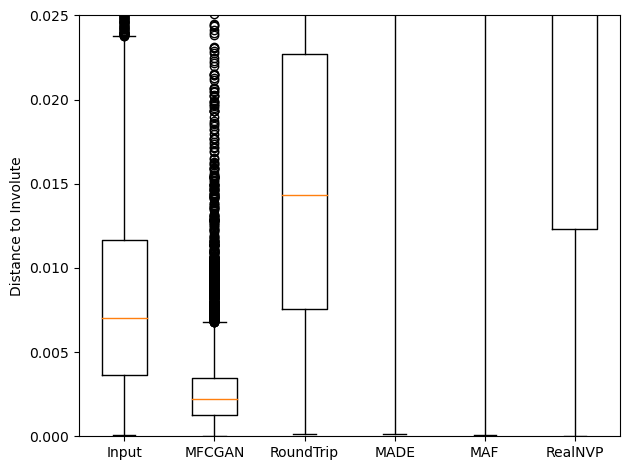

Distance to Involute

                  0             1             2             3             4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.008286      0.005735      0.020919      0.090212      0.075268   
std        0.005895      0.017165      0.023432      0.080916      0.088810   
min        0.000049      0.000026      0.000145      0.000158      0.000089   
50%        0.007050      0.002188      0.014310      0.079764      0.060316   
75%        0.011679      0.003470      0.022686      0.124684      0.107203   
95%        0.019730      0.013634      0.075853      0.165049      0.157170   
99%        0.026255      0.112957      0.121202      0.429069      0.360314   
max        0.037634      0.166015      0.165012      1.198931      1.827259   

                  5  
count  10000.000000  
mean       0.065134  
std        0.137011  
min        0.000032  
50%        0.036494  
75%        0.089715  
95%        0.151012  
99%        

In [6]:
def pdinvolute(X):
    import numpy as np
    from scipy.spatial.distance import cdist
    # Define the spiral curve
    t = np.linspace(0, 1, 2000)
    curve_points = np.column_stack([t*np.cos(t*6*np.pi), t*np.sin(t*6*np.pi)])
    
    # Compute pairwise distances between X and the curve points
    distances = cdist(X, curve_points)
    
    # Find the minimum distance for each row of X
    min_distances = np.min(distances, axis=1)
    
    return min_distances

files = ['datasets\involute\B.csv','results\involute\data_out.csv', #'results\involute\data_noise.csv', 
         'results\\roundtrip\involute.npy',
    'results\\normalizing_flows\made\INVOLUTE_sample.csv',  'results\\normalizing_flows\maf\INVOLUTE_sample.csv', 'results\\normalizing_flows\\realnvp\INVOLUTE_sample.csv',]
data = read_data_from_files(files)
Dist = []


u = np.linspace(0, 1, 30000)
x_involute = u * np.cos(6 * np.pi * u)
y_involute = u * np.sin(6 * np.pi * u)

Dist = []
for df in data:    
    # Calculate the closest value of u for each row
    distances = pdinvolute(df)
    Dist.append(distances)


# Plot boxplots

Dist = np.array(Dist).T

plt.boxplot(Dist)
plt.ylabel('Distance to Involute')
plt.xticks([1, 2, 3, 4, 5, 6], ['Input','MFCGAN', 'RoundTrip','MADE','MAF','RealNVP'])
plt.tight_layout()
plt.show()

plt.boxplot(Dist)
plt.ylim(0, 0.025)
plt.ylabel('Distance to Involute')
plt.xticks([1, 2, 3, 4, 5, 6], ['Input','MFCGAN', 'RoundTrip','MADE','MAF','RealNVP'])
plt.tight_layout()
plt.show()

Dist = pd.DataFrame(Dist)
print('Distance to Involute\n')
print(Dist.describe(percentiles=[0.75,0.95,0.99])) # Mean, std, min, max, quartiles
print('Percentage of points with distance > 0.03\n')
print(Dist.apply(lambda col: (col > 0.03).mean() * 100))

statistics = {
    'Mean': np.mean(Dist, axis=0),
    'SD': np.std(Dist, axis=0),
    'Quantile': np.quantile(Dist, q=0.95, axis=0),
    'Percentage > 0.03': np.mean(Dist > 0.03, axis=0) * 100
}

# Create a new dataframe with the calculated statistics
stats_df = pd.DataFrame(statistics)

# Format the numbers to retain two decimal places or use scientific notation
formatted_stats_df = stats_df.applymap(lambda x: f'{x:.2f}' if x >= 0.01 else f'{x:.2e}')

# Print the formatted statistics dataframe
print(formatted_stats_df)

File results\roundtrip\torus.npy does not exist or not csv


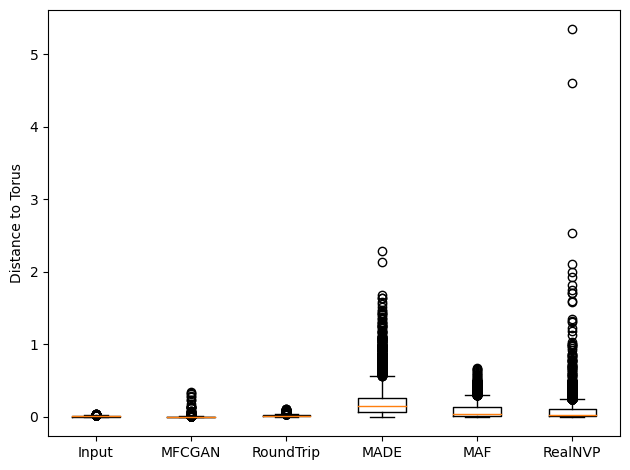

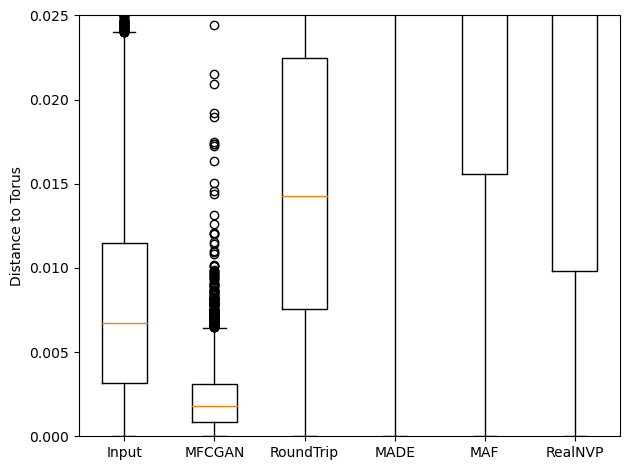

Distance to Torus

                  0             1             2             3             4  \
count  10000.000000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean       0.007981  2.566536e-03      0.016466      0.189242      0.089746   
std        0.006041  9.104978e-03      0.012124      0.178845      0.104215   
min        0.000003  1.676505e-08      0.000006      0.000021      0.000006   
50%        0.006732  1.770659e-03      0.014274      0.145016      0.043507   
75%        0.011502  3.084192e-03      0.022456      0.265894      0.130488   
95%        0.019834  5.508574e-03      0.040231      0.477351      0.319312   
99%        0.025638  8.208885e-03      0.050967      0.876743      0.420795   
max        0.043725  3.446326e-01      0.113334      2.293547      0.670021   

                  5  
count  10000.000000  
mean       0.080280  
std        0.144582  
min        0.000009  
50%        0.025819  
75%        0.102183  
95%        0.320324  
99%        0.4

In [7]:
def pdtorus(X, R=1.0, r=0.5):
    import numpy as np

    temp1 = np.sqrt(X[:, 0]**2 + X[:, 1]**2)
    temp2 = R / temp1
    temp3 = (R - temp1)**2 + X[:, 2]**2
    w1 = r / np.sqrt(temp3)
    w0 = temp2 + (1 - temp2) * w1

    P = np.multiply(X, np.vstack([w0, w0, w1]).T)

    d = np.sqrt(np.sum((X - P)**2, axis=1))

    return d


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


files = ['datasets\\torus\B.csv','results\\torus\data_out.csv', #'results\\torus\data_noise.csv' , 
         'results\\roundtrip\\torus.npy',
    'results\\normalizing_flows\made\TORUS_sample.csv', 'results\\normalizing_flows\maf\TORUS_sample.csv', 'results\\normalizing_flows\\realnvp\TORUS_sample.csv',]
data = read_data_from_files(files)
Dist = []


for df in data:    
    # Calculate the closest value of u for each row
    distances = pdtorus(df)
    Dist.append(distances)


# Plot boxplots

Dist = np.array(Dist).T

plt.boxplot(Dist)
plt.ylabel('Distance to Torus')
plt.xticks([1, 2, 3, 4, 5, 6], ['Input','MFCGAN', 'RoundTrip','MADE','MAF','RealNVP'])
plt.tight_layout()
plt.show()

plt.boxplot(Dist)
plt.ylabel('Distance to Torus')
plt.xticks([1, 2, 3, 4, 5, 6], ['Input','MFCGAN', 'RoundTrip','MADE','MAF','RealNVP'])
plt.ylim(0, 0.025)
plt.tight_layout()
plt.show()

Dist = pd.DataFrame(Dist)
print('Distance to Torus\n')
print(Dist.describe(percentiles=[0.75,0.95,0.99])) # Mean, std, min, max, quartiles
print('Percentage of points with distance > 0.03\n')
print(Dist.apply(lambda col: (col > 0.03).mean() * 100)) # Percentage of points that are more than 0.03 away from the torus

statistics = {
    'Mean': np.mean(Dist, axis=0),
    'SD': np.std(Dist, axis=0),
    'Quantile': np.quantile(Dist, q=0.95, axis=0),
    'Percentage > 0.03': np.mean(Dist > 0.03, axis=0) * 100
}

# Create a new dataframe with the calculated statistics
stats_df = pd.DataFrame(statistics)

# Format the numbers to retain two decimal places or use scientific notation
formatted_stats_df = stats_df.applymap(lambda x: f'{x:.2f}' if x >= 0.01 else f'{x:.2e}')

# Print the formatted statistics dataframe
print(formatted_stats_df)